**Нейрон смещения** или **bias-нейрон** — это третий вид нейронов, используемый в большинстве нейросетей. Это гиперпараметр, его наличие/отсутствие определяется вами.

Особенность этого типа нейронов заключается в том, что его вход и выход всегда равняются 1 и они никогда не имеют входных синапсов. Нейроны смещения могут, либо присутствовать в нейронной сети по одному на слое, либо полностью отсутствовать, 50/50 быть не может.

Соединения у нейронов смещения такие же, как у обычных нейронов — со всеми нейронами следующего уровня, за исключением того, что синапсов между двумя bias нейронами быть не может. Следовательно, их можно размещать на входном слое и всех скрытых слоях, но никак не на выходном слое, так как им попросту не с чем будет формировать связь.

Применение:
- дает возможность изменять выходной результат, путем сдвига графика функции активации вправо или влево
- помогают в том случае, когда все входные нейроны получают на вход 0 и независимо от того какие у них веса, они все передадут на следующий слой 0, но не в случае присутствия нейрона смещения

Рассмотрим как он работает на примере полносвязной сети.

Возьмем для примера простейшую нейросеть для бинарной классификации (1 класс - кошка / 2 класс - собака).

Каждый экземпляр (изображение кошки и собаки) имеет два параметра (некие x1 и x2, рост и вес в цифрах, например), при помощи нейросети мы должны отнести его к одному из двух классов.

Подготавливаем данные, подаем в сеть, обрабатываем функцией активации f(x) и в итоге получаем прогноз, к какому классу сеть отнесла экземпляр.


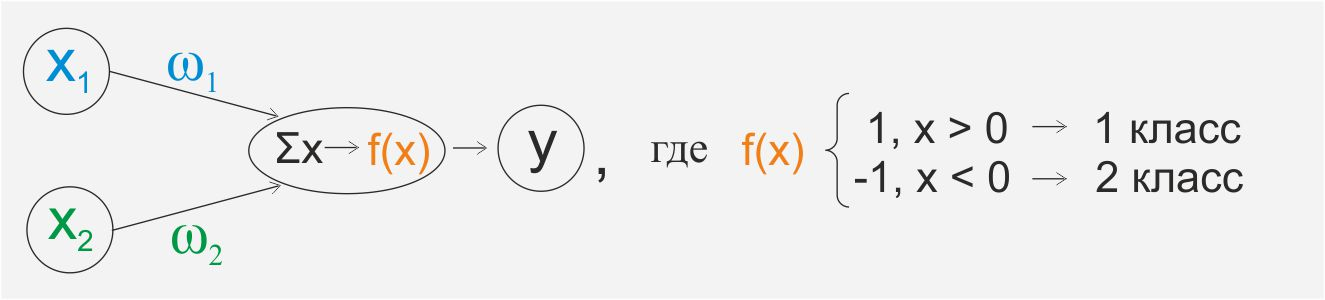

Из формулы активационной функции f(x) следует, что граница разделения классов это x = 0. Если x больше нуля - то 1 класс, если меньше - то второй. В виде формул та же самая мысль выглядит вот так:

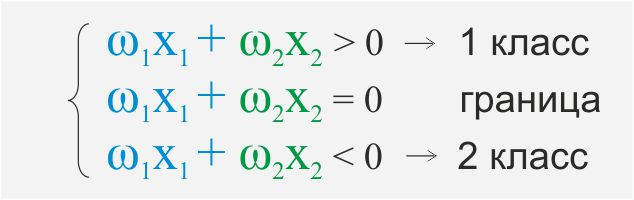

Рассмотрим внимательнее уравнение, которое описывает границу. Небольшое преобразование показывает нам, что это не что иное, как уравнение прямой. Она проходит через начало координат под некоторым наклоном к оси абсцисс (определяется угловым коэффициентом k = - w1/w2):

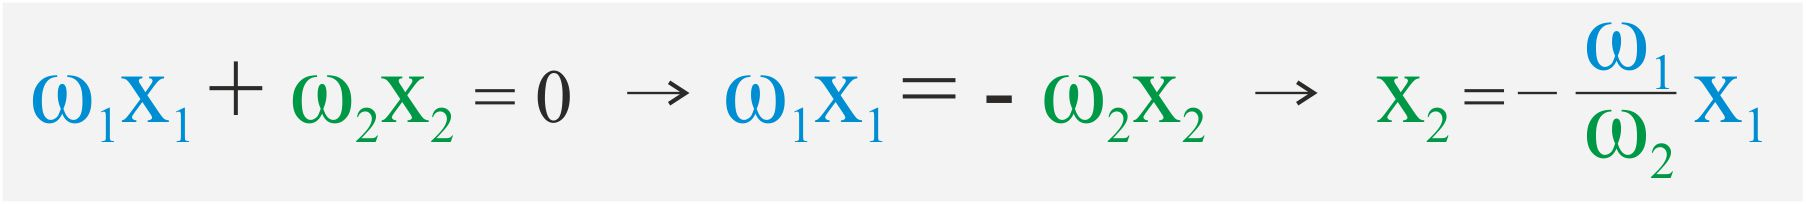

Относительно прямой можно определить множество точек класса 1 и класса 2 на плоскости. Они будут выше и ниже соотв., а сама прямая называется разделяющей (в многомерном - разделяющая гиперплоскость).

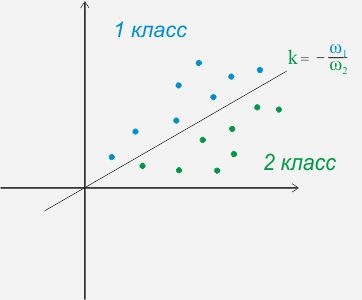

Однако не всегда точки на плоскости распределены так, что прямая через начало координат может  разграничить два класса.

Для демонстрации поднимем выше все точки на графике. Видим, что прямая перестала быть однозначной границей, и даже изменение ее угла не помогает разрешить ситуацию, минимизировать loss.

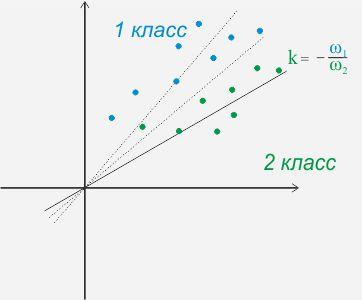

Чтобы прямая снова стала разделяющей, ее необходимо поднять по оси ординат вверх на некоторую величину. Это и есть bias - b, порог, смещение.

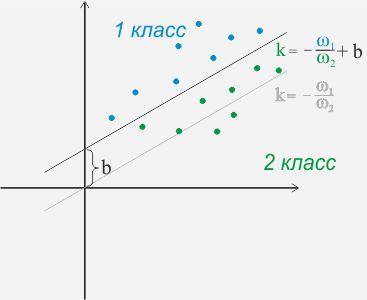

Это третий вход x3, который всегда имеет значение +1 и некий вес w3.

Перепишем нейросеть с учетом новых данных:

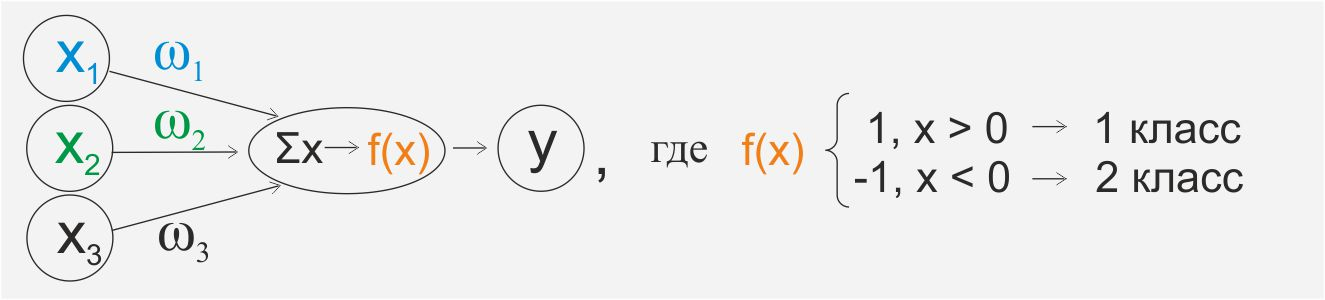

**Как создавать нейрон смещения в Keras?**



Параметру **use_bias** в описании слоя присваивается значение True. На текущий момент это значение по умолчанию, поэтому если вы не упомянете нейрон смещения - сеть автоматически его добавит. Чтобы отключить use_bias = False.

Создадим полносвязную сеть из одного входного (на 784 нейрона), одного скрытого (на 300 нейронов) и одного выходного (на 10 нейронов) слоев.

Посчитаем, сколько весов описывают нейросеть:
- 784 * 300 = 235 200 весов
- 10 * 300 = 3000 весов
- 1 * 10 = 10 весов

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.utils import plot_model

model = Sequential()
model.add(Dense(300, activation = "relu", use_bias = False, input_shape = (784,), name ='Dense_300'))
model.add(Dense(10, activation = "softmax", name ='Dense_10'))

model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Dense_300 (Dense)            (None, 300)               235200    
_________________________________________________________________
Dense_10 (Dense)             (None, 10)                3010      
Total params: 238,210
Trainable params: 238,210
Non-trainable params: 0
_________________________________________________________________


Теперь создадим аналогичную нейросеть, но с нейроном смещения. Это значит, что для соединения нейрона со скрытым слоем потребуетс еще 1 * 300 связей, и в сумме количество параметров должно увеличиться на 300. Проверим:

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.utils import plot_model

model = Sequential()
model.add(Dense(300, activation = "relu", use_bias = True, input_shape = (784,), name ='Dense_300'))
model.add(Dense(10, activation = "softmax", name ='Dense_10'))

model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Dense_300 (Dense)            (None, 300)               235500    
_________________________________________________________________
Dense_10 (Dense)             (None, 10)                3010      
Total params: 238,510
Trainable params: 238,510
Non-trainable params: 0
_________________________________________________________________


**Резюме:**

- нейрон смещения, в ряде случаев, позволяет при решении задачи обойтись меньшим количеством нейронов/связей.

- нейроны смещения могут либо присутствовать в каждом слое или отсутствовать (кроме выходного слоя).

- в случае с нелинейными функциями активации, например, сигмоидой, веса позволяют изменять наклон сигмоиды, а смещением по оси y управляет нейрон смещения.